In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Data Loading

In [2]:
%run ../util/load_data.py
%run ../util/data_visualization.py
%run ../util/outliers_statistics.py

import warnings
warnings.filterwarnings('ignore')

data = load_data("../../Data", aggregate=False)

E:\Anaconda\envs\Homework3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


# Classification

Let's create now the estimator pipeline.

In [6]:
linear_classifier = Pipeline([
    ('scl', StandardScaler()),
    ('clf', svm.LinearSVC(verbose=True))
])

kernelized_classifier = Pipeline([
    ('scl', StandardScaler()),
    ('clf', svm.SVC(C=100,verbose=True))
])

X = data['train_data'].drop(columns=[data['target'][0],"Id"])
y = data['train_data'][data['target']]

## Learning curve

<module 'matplotlib.pyplot' from 'E:\\Anaconda\\envs\\Homework3\\lib\\site-packages\\matplotlib\\pyplot.py'>

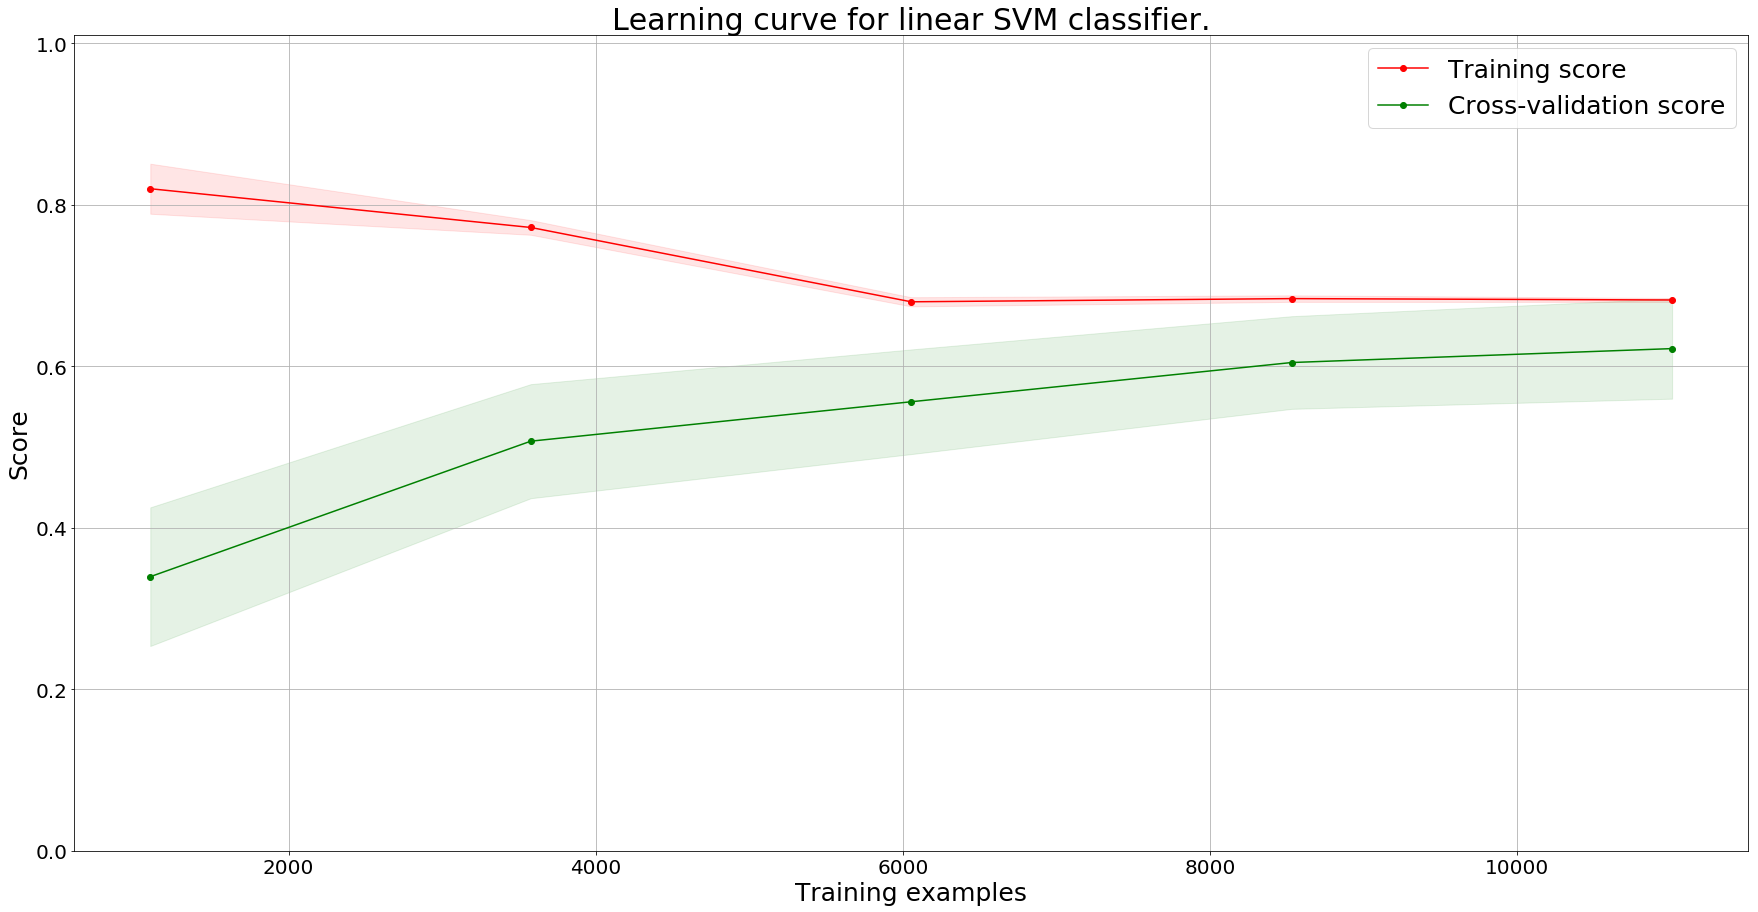

In [8]:
kfold = StratifiedKFold(n_splits = 10)
plot_learning_curve(linear_classifier, 'Learning curve for linear SVM classifier.', 
                    X, y, ylim=(0, 1.01), cv=kfold, n_jobs=10)

<module 'matplotlib.pyplot' from 'E:\\Anaconda\\envs\\Homework3\\lib\\site-packages\\matplotlib\\pyplot.py'>

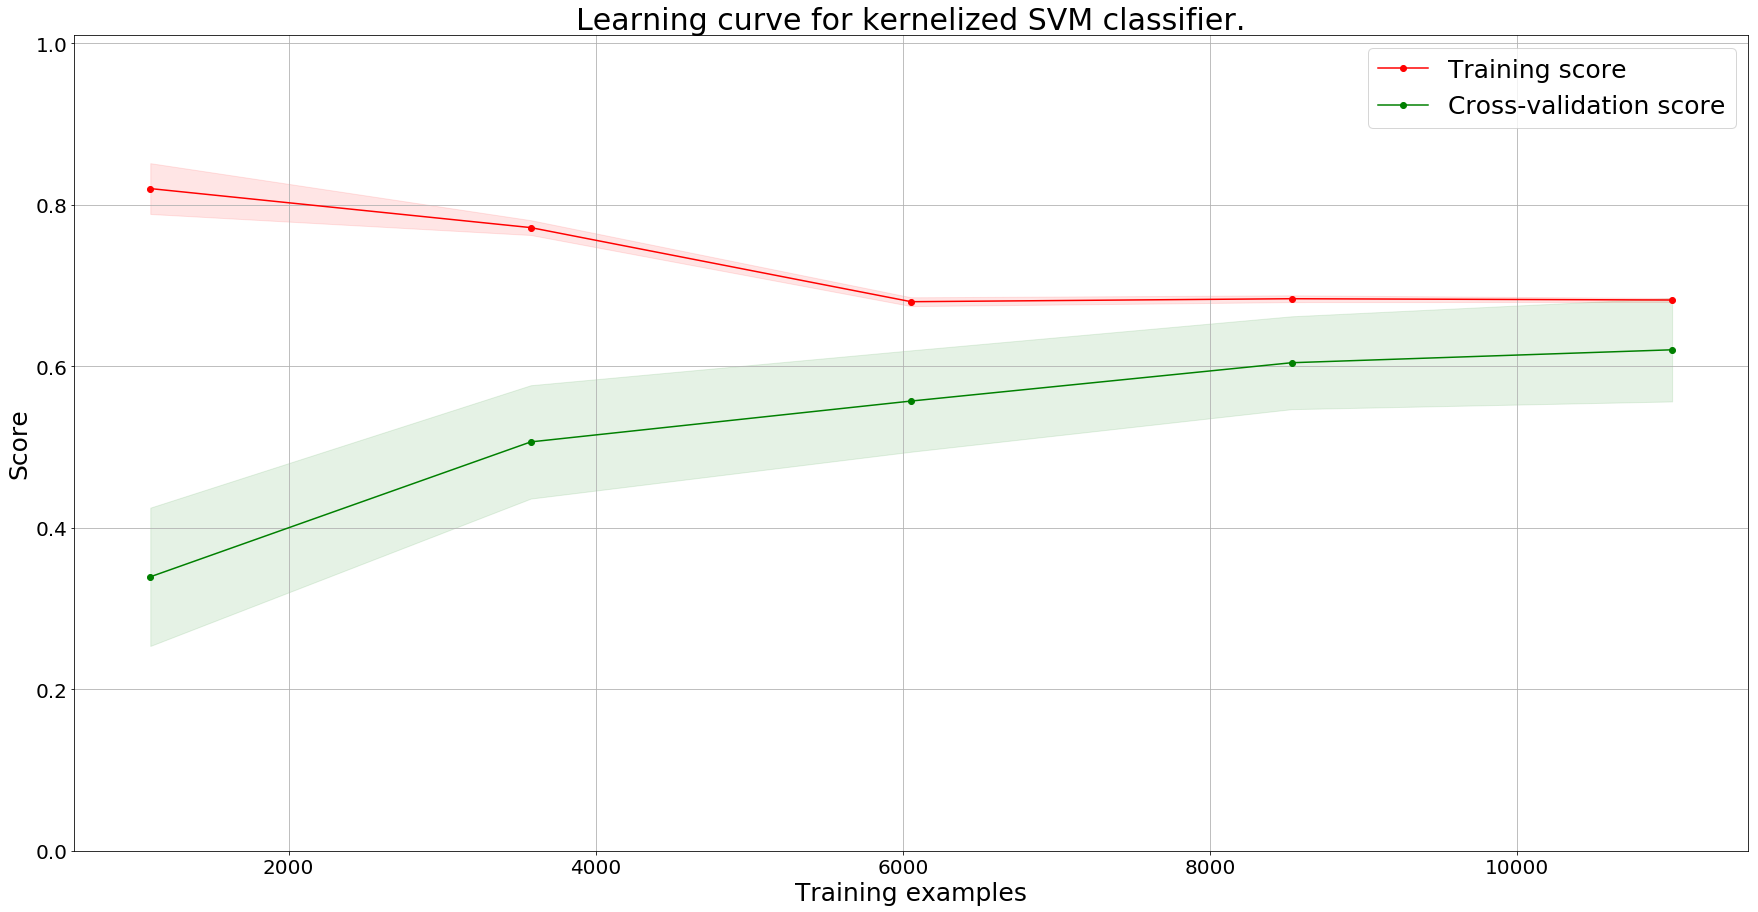

In [9]:
kfold = StratifiedKFold(n_splits = 10)
plot_learning_curve(linear_classifier, 'Learning curve for kernelized SVM classifier.', 
                    X, y, ylim=(0, 1.01), cv=kfold, n_jobs=10)

## Validation curve with tree max_depth

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

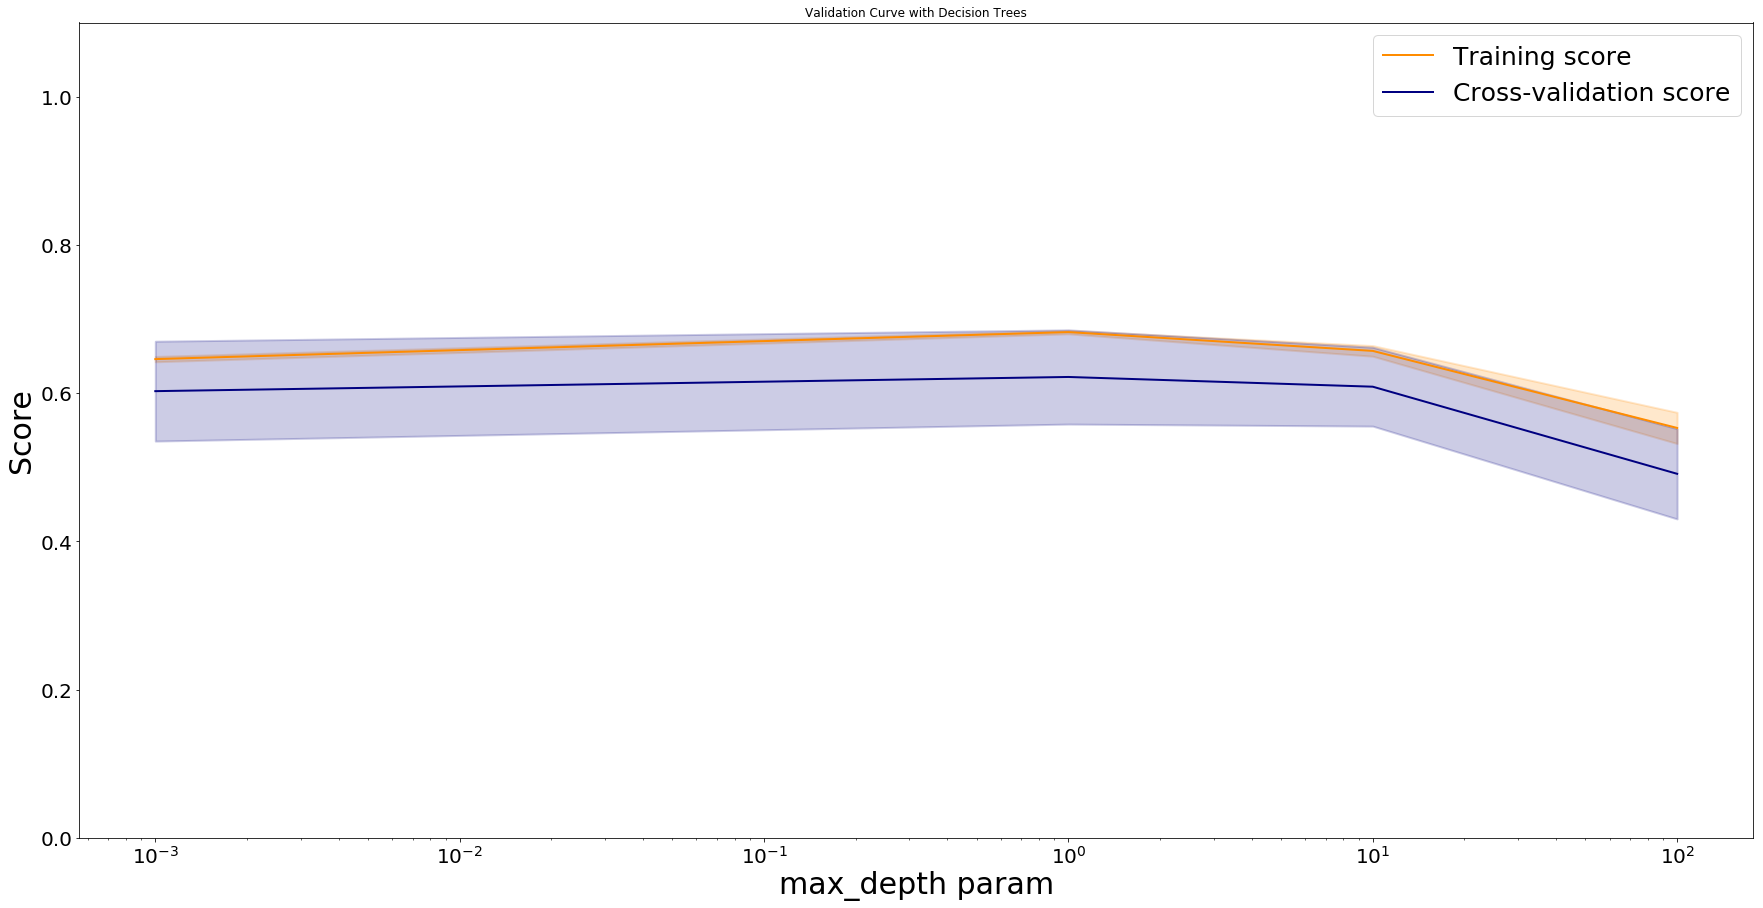

In [10]:
param_range = [0.001, 1, 10, 100]

train_scores, test_scores = validation_curve(
    estimator = linear_classifier,
    X = X,
    y = y,
    param_name = 'clf__C',
    param_range = param_range,
    cv = 10
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(30, 15))
plt.title("Validation Curve with Decision Trees")
plt.xlabel("max_depth param", fontsize=30)
plt.ylabel("Score", fontsize=30)
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best", prop={'size': 25})
plt.tick_params(labelsize=20)

plt.show()


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

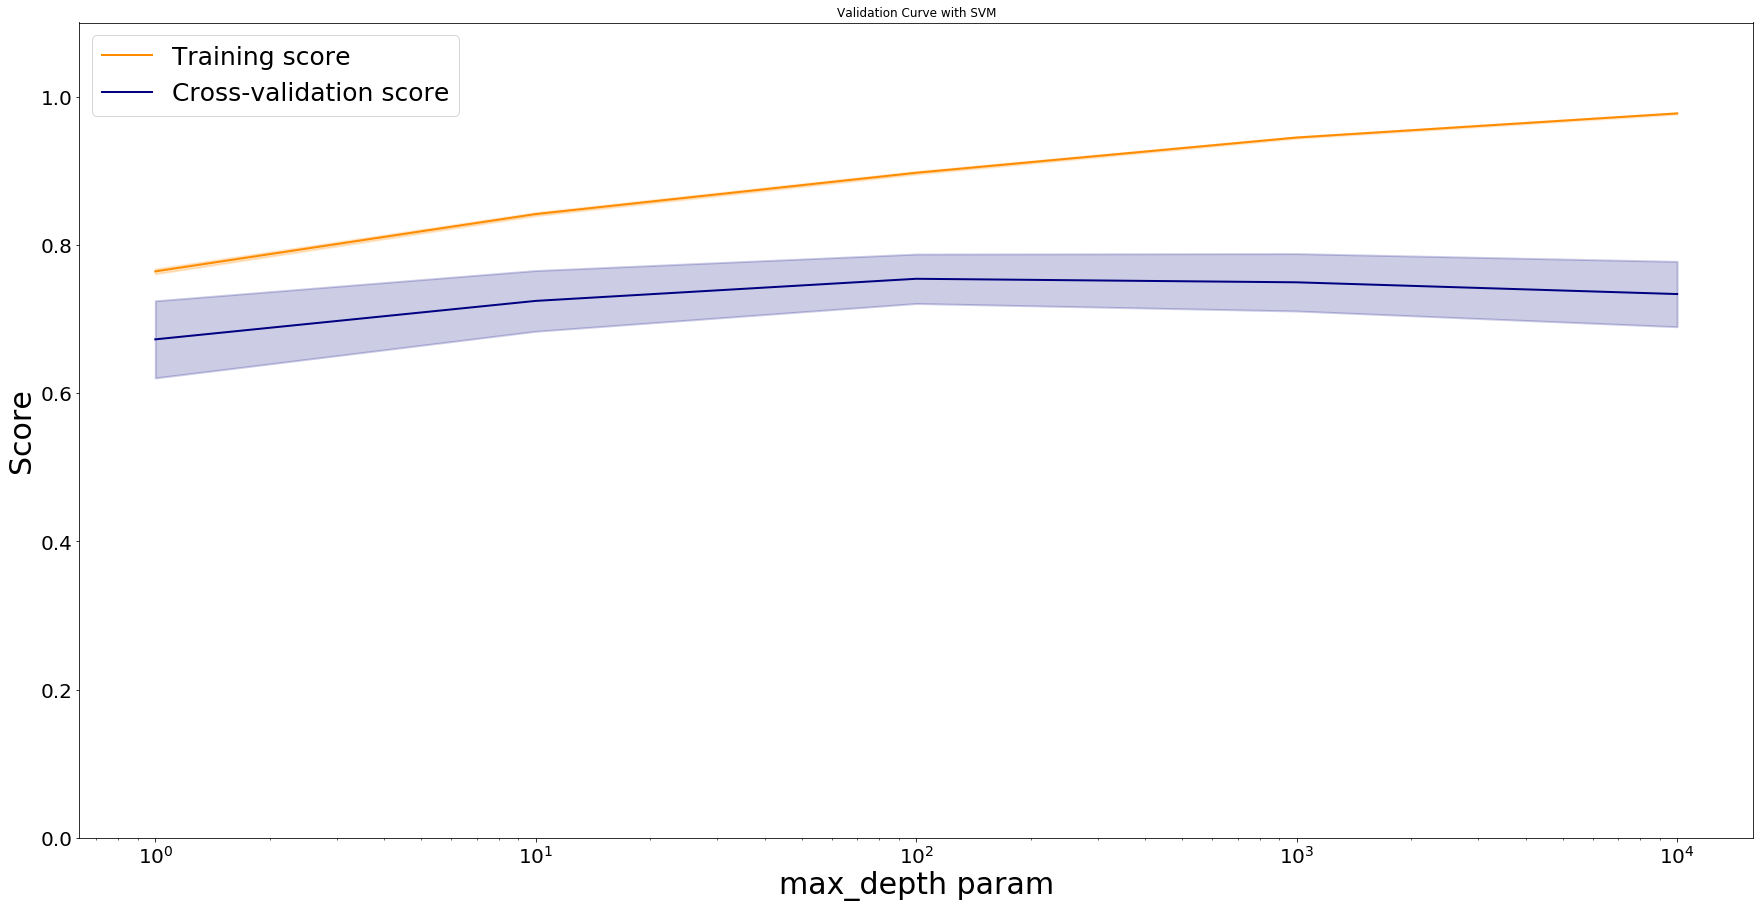

In [11]:
param_range = [1, 10, 100, 1000, 10000]

train_scores, test_scores = validation_curve(
    estimator = kernelized_classifier,
    X = X,
    y = y,
    param_name = 'clf__C',
    param_range = param_range,
    cv = 10
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(30, 15))
plt.title("Validation Curve with SVM")
plt.xlabel("max_depth param", fontsize=30)
plt.ylabel("Score", fontsize=30)
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best", prop={'size': 25})
plt.tick_params(labelsize=20)

plt.show()


## Fetching the classifier results 

In [12]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

y_predicted_total = [None] * len(X)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    kernelized_classifier.fit(X_train, y_train)
    
    y_predicted = kernelized_classifier.predict(X_test).tolist()
    for idx, index in enumerate(test_index):
        y_predicted_total[index] = y_predicted[idx]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

## Confusion matrix

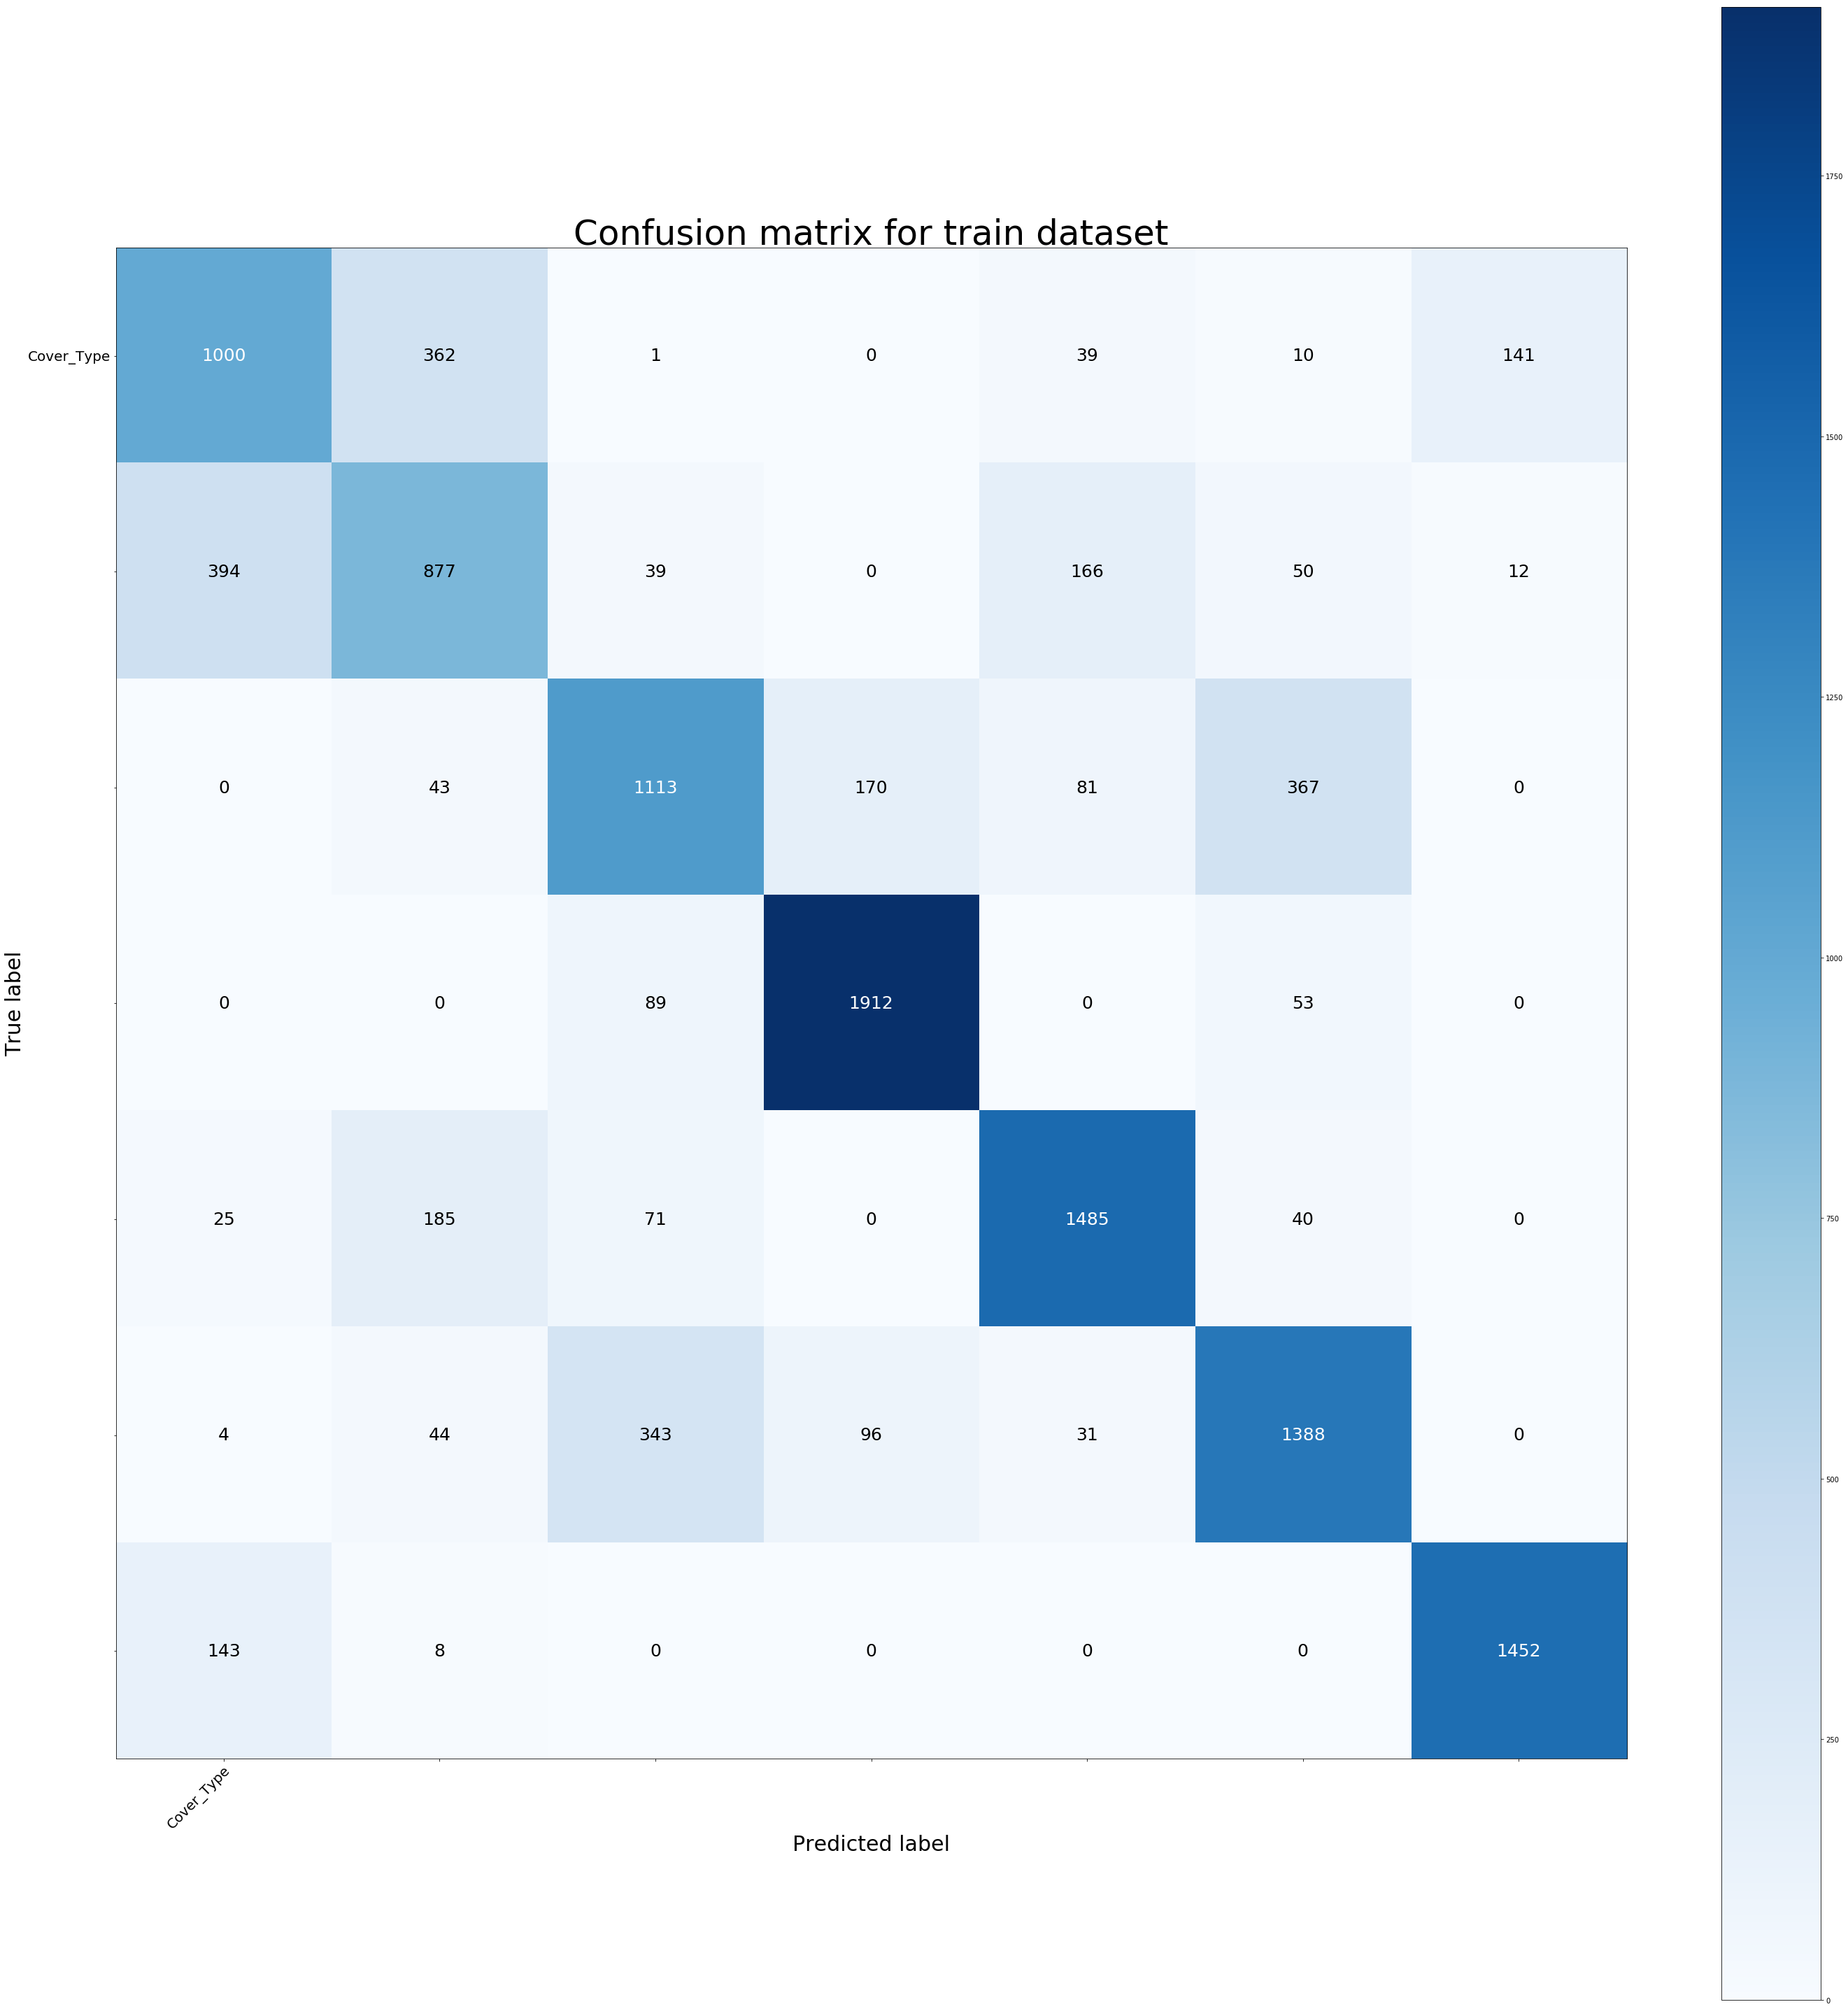

In [13]:
plot_confusion_matrix(y, y_predicted_total, classes=list(set(y[data['target']])),
                  title='Confusion matrix for train dataset')

## Classification results (precision, recall, F1-score)

In [14]:
target_names = ['Class ' + str(index) for index in list(set(y[data['target'][0]].tolist()))]
print(classification_report(y, y_predicted_total, target_names=target_names))

              precision    recall  f1-score   support

     Class 1       0.64      0.64      0.64      1553
     Class 2       0.58      0.57      0.57      1538
     Class 3       0.67      0.63      0.65      1774
     Class 4       0.88      0.93      0.90      2054
     Class 5       0.82      0.82      0.82      1806
     Class 6       0.73      0.73      0.73      1906
     Class 7       0.90      0.91      0.91      1603

   micro avg       0.75      0.75      0.75     12234
   macro avg       0.75      0.75      0.75     12234
weighted avg       0.75      0.75      0.75     12234



## Hyperparameters optimization

In [15]:
print("Fitting the classifier to the training set")
t0 = time()

param_grid = {
    'clf__C': [1, 10, 100, 1000, 10000]
}

search = GridSearchCV(kernelized_classifier, param_grid, cv=5)

search = search.fit(X, y)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(search.best_estimator_)

Fitting the classifier to the training set
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]done in 277.358s
Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=True))])
